# Task 05: Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('US_Accidents_March23.csv')

In [4]:
df.shape

(7728394, 46)

In [6]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
df.shape

(7728394, 46)

In [20]:
df.State.unique

<bound method Series.unique of 0          OH
1          OH
2          OH
3          OH
4          OH
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7728394, dtype: object>

In [108]:
cout=df['State'].value_counts()
cout

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: State, dtype: int64

In [109]:
df1=df[df['State']=='IL']   #make of dataframe of selecting  "IL" state name from "State" Column

In [66]:
df1.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
167293,A-167300,Source2,2,2016-11-30 14:56:10,2016-11-30 17:10:53,41.816620,-88.168243,NaN,NaN,0.01,...,False,False,False,True,False,Day,Day,Day,Day,167300
167294,A-167301,Source2,2,2016-11-30 16:46:21,2016-11-30 17:31:05,41.859348,-88.067284,NaN,NaN,0.01,...,False,False,False,True,False,Night,Day,Day,Day,167301
167295,A-167302,Source2,2,2016-11-30 16:47:35,2016-11-30 17:31:48,41.860516,-87.992729,NaN,NaN,0.01,...,False,False,False,True,False,Night,Day,Day,Day,167302
167296,A-167303,Source2,2,2016-11-30 17:01:04,2016-11-30 17:45:46,42.377563,-87.865288,NaN,NaN,0.00,...,False,False,False,True,False,Night,Night,Day,Day,167303
167297,A-167304,Source2,2,2016-11-30 17:15:22,2016-11-30 18:00:08,41.810738,-87.947052,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Day,Day,167304
167298,A-167305,Source2,2,2016-11-30 17:16:20,2016-11-30 18:01:04,42.320366,-88.302498,NaN,NaN,0.00,...,False,False,False,True,False,Night,Night,Day,Day,167305
167300,A-167307,Source2,2,2016-11-30 17:49:36,2016-11-30 18:34:25,41.881138,-88.072380,NaN,NaN,0.00,...,False,False,False,False,False,Night,Night,Night,Day,167307
167301,A-167308,Source2,2,2016-11-30 17:50:32,2016-11-30 18:35:22,41.774406,-87.935806,NaN,NaN,0.01,...,False,False,False,True,False,Night,Night,Night,Day,167308
167302,A-167309,Source2,2,2016-11-30 17:59:57,2016-11-30 18:44:42,41.852089,-88.202934,NaN,NaN,0.01,...,False,False,False,True,False,Night,Night,Night,Day,167309
167303,A-167310,Source2,2,2016-11-30 18:01:52,2016-11-30 18:46:34,42.002453,-88.179146,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Night,167310


In [70]:
df1=df1.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition','Precipitation(in)','City','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [71]:
df1.shape

(101402, 47)

In [73]:
df1.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'IDD'],
      dtype='object')

In [74]:
df1['Weather_Condition'].value_counts()

Fair                   35732
Cloudy                 20338
Mostly Cloudy          14366
Partly Cloudy           7539
Light Snow              7360
                       ...  
Small Hail                 2
Light Sleet / Windy        1
Thunderstorm               1
Light Rain Showers         1
Squalls / Windy            1
Name: Weather_Condition, Length: 69, dtype: int64

In [75]:
df_cat=df1.select_dtypes('object')
df_num=df1.select_dtypes(np.number)
df_cat=df_cat.drop('ID',axis=1)

In [116]:
df_num.head(5)
#df_cat.head(5)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),IDD
167293,2,41.816620,-88.168243,NaN,NaN,0.01,36.0,27.5,82.0,29.62,10.0,12.7,0.0,167300
167297,2,41.810738,-87.947052,NaN,NaN,0.01,37.0,28.1,79.0,29.68,9.0,15.0,0.0,167304
167301,2,41.774406,-87.935806,NaN,NaN,0.01,37.9,29.2,70.0,29.69,10.0,15.0,0.0,167308
167305,2,41.736378,-87.624580,NaN,NaN,0.01,37.9,29.2,70.0,29.69,10.0,15.0,0.0,167312
167315,3,41.799076,-87.802094,NaN,NaN,0.01,37.0,28.1,76.0,29.73,9.0,15.0,0.0,167322


In [76]:
df_cat=df1.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,ID,101402
1,Source,3
2,Start_Time,94527
3,End_Time,97627
4,Description,54291
5,Street,7956
6,City,640
7,County,93
8,State,1
9,Zipcode,10590


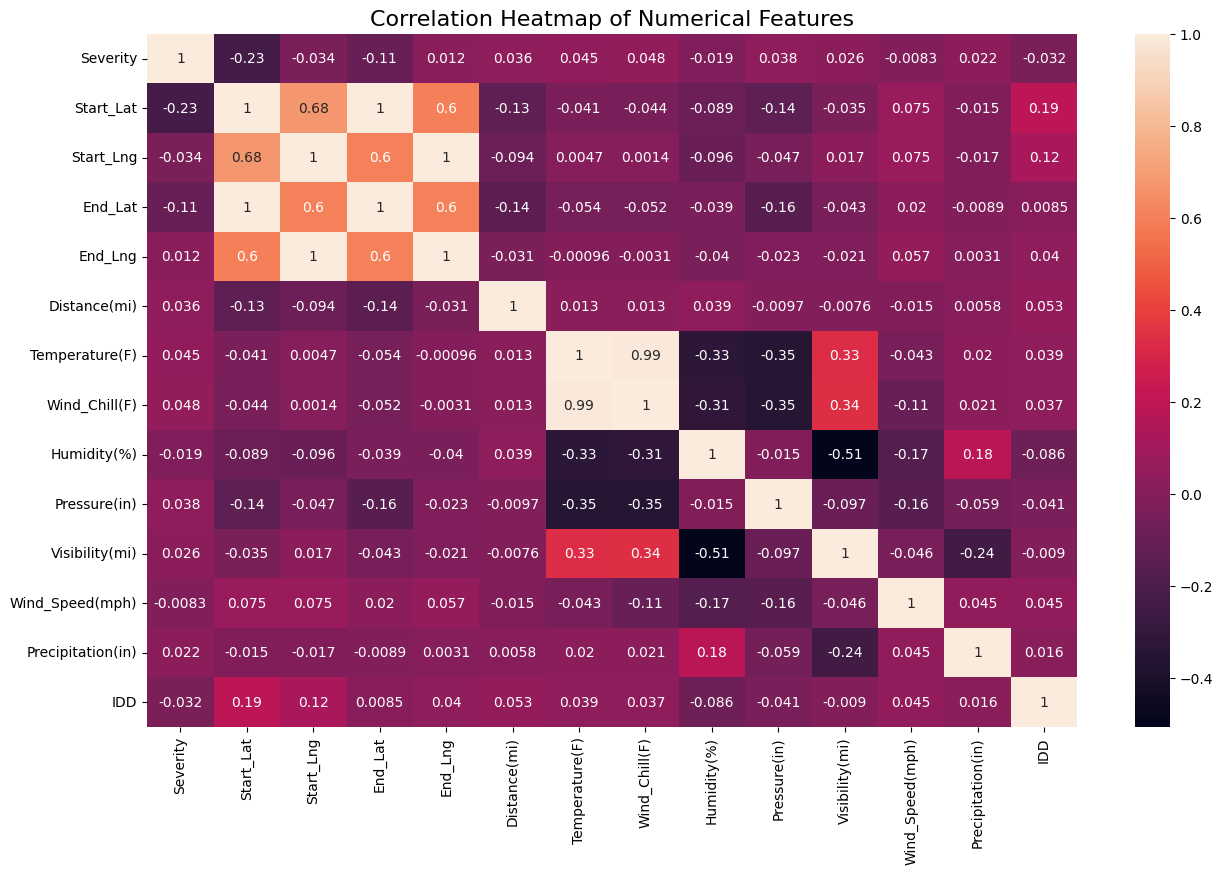

In [106]:
plt.figure(figsize=(15, 9))
heatmap = sns.heatmap(df_num.corr(), annot=True)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

plt.show()

In [84]:
cities = df1['City'].unique()
len(cities)

640

In [85]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

Chicago        21123
Elgin           2709
Elmhurst        2034
Gurnee          1773
Lake Zurich     1772
               ...  
Elmwood            1
Kingston           1
Compton            1
Ringwood           1
Milford            1
Name: City, Length: 640, dtype: int64

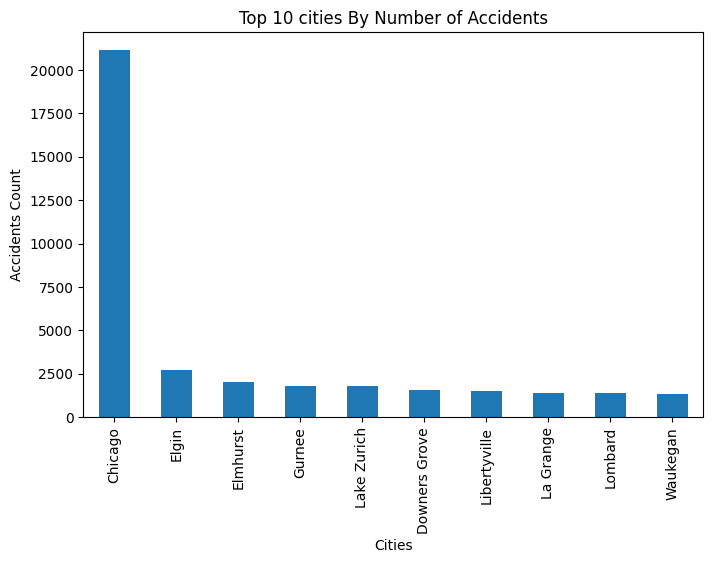

In [86]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities'
       ylabel = 'Accidents Count')
plt.show()

In [87]:
accidents_severity = df1.groupby('Severity').count()['ID']
accidents_severity

Severity
1     1534
2    58520
3    39088
4     2260
Name: ID, dtype: int64

In [89]:
df1 = df1.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
df1['Start_Time'].dtypes

dtype('<M8[ns]')

In [91]:
df1['start_date'] = [d.date() for d in df1['Start_Time']]
df1['start_time'] = [d.time() for d in df1['Start_Time']]
df1['end_date'] = [d.date() for d in df1['End_Time']]
df1['end_time'] = [d.time() for d in df1['End_Time']]
df1['end_time']

167293     17:10:53
167297     18:00:08
167301     18:35:22
167305     18:42:08
167315     03:26:33
             ...   
7728100    18:10:38
7728101    18:54:36
7728102    19:40:01
7728103    21:32:43
7728104    21:23:54
Name: end_time, Length: 101402, dtype: object

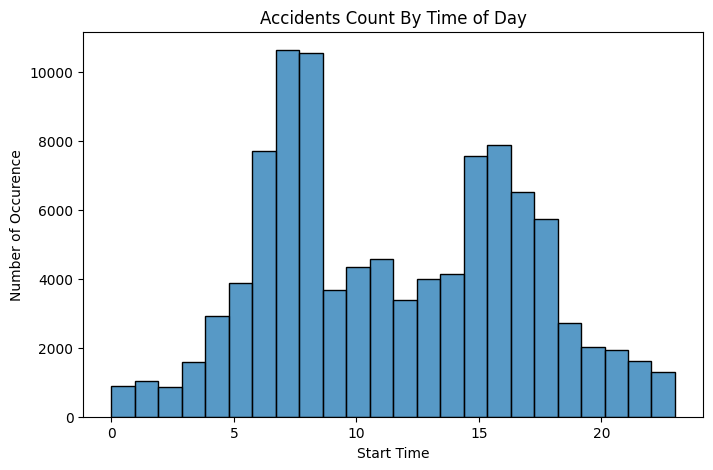

In [92]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

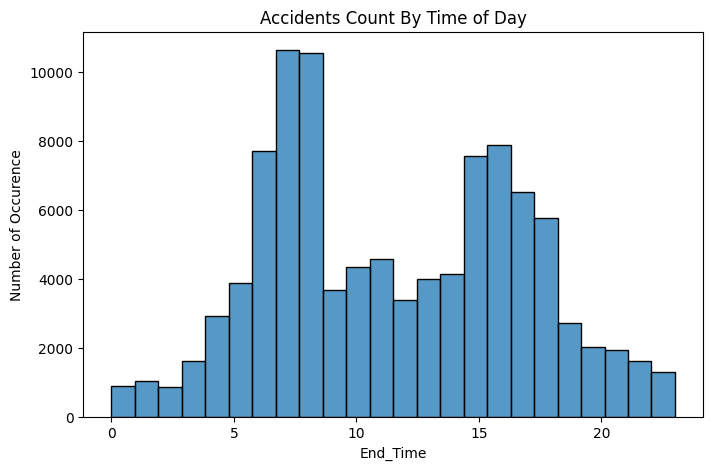

In [93]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

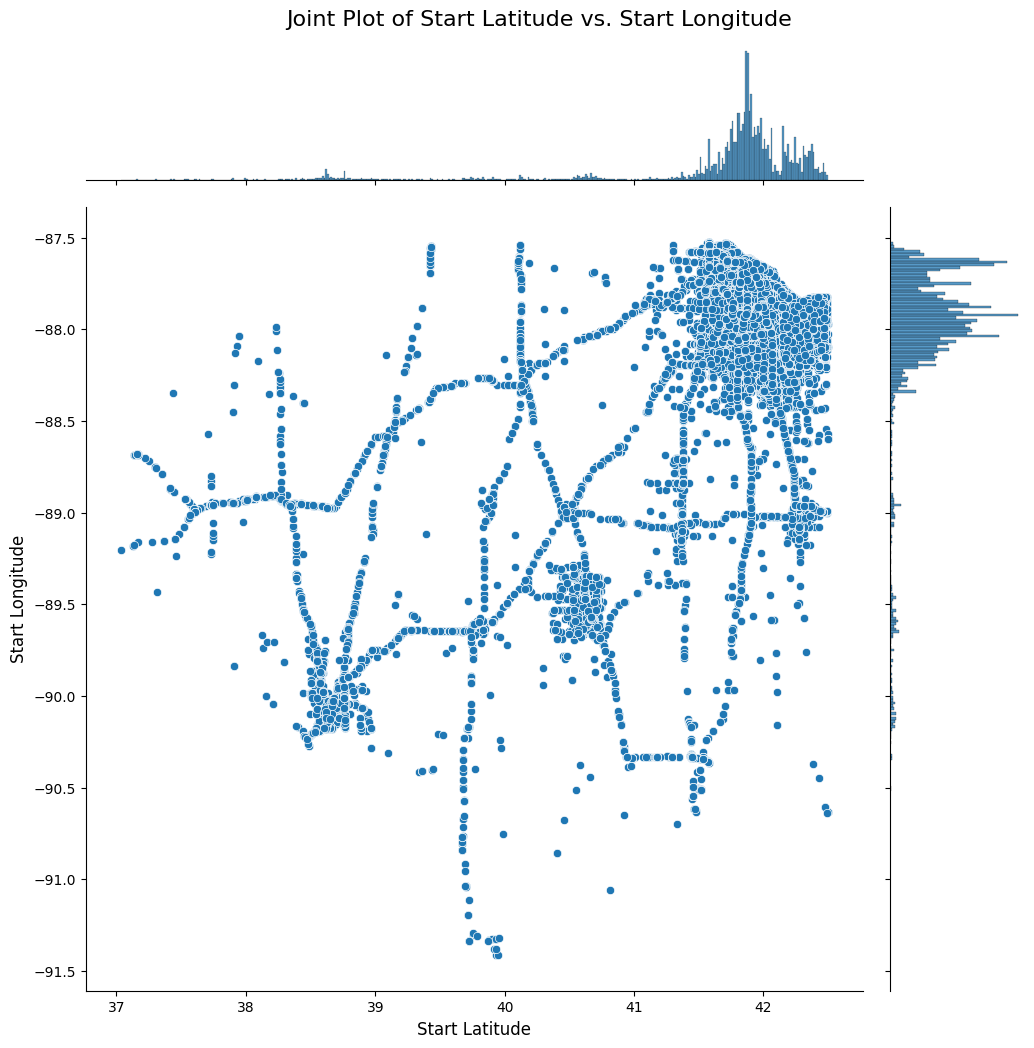

In [105]:

sns.jointplot(
    x=df_num.Start_Lat.values,
    y=df_num.Start_Lng.values,
    height=10
)

plt.ylabel('Start Longitude', fontsize=12)
plt.xlabel('Start Latitude', fontsize=12)
plt.suptitle('Joint Plot of Start Latitude vs. Start Longitude', fontsize=16, y=1.02)

plt.show()

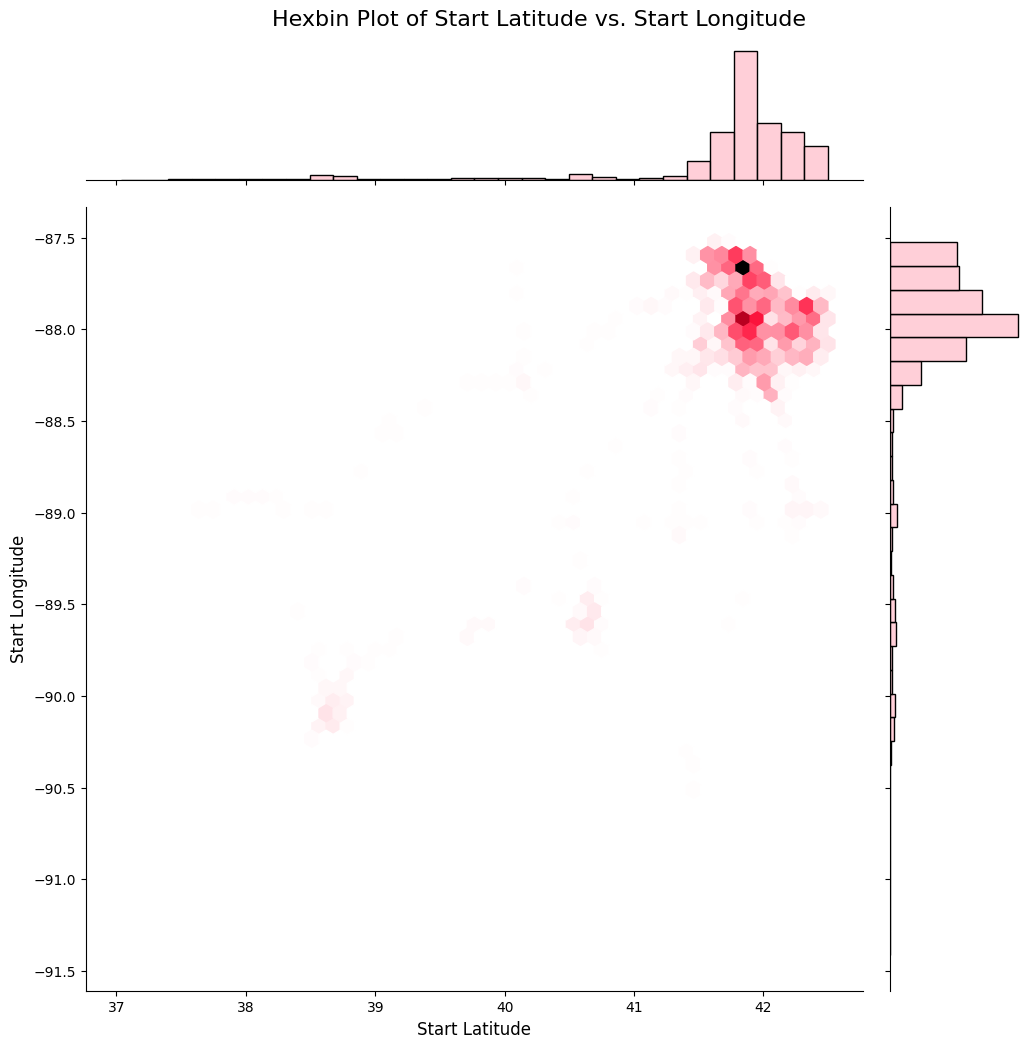

In [103]:
g = sns.jointplot(
    x=df_num.Start_Lat.values,
    y=df_num.Start_Lng.values,
    kind='hex',                
    color='pink',              
    height=10,
    marginal_kws={'bins': 30, 'fill': True}  
)

plt.ylabel('Start Longitude', fontsize=12)
plt.xlabel('Start Latitude', fontsize=12)
plt.suptitle('Hexbin Plot of Start Latitude vs. Start Longitude', fontsize=16, y=1.02)
plt.show()